<a href="https://colab.research.google.com/github/leomensah/COMPUTER-VISION/blob/main/skin_detection_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORTING THE VARIOUS MODULES NEEDED FOR THE PROJECT

In [ ]:
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
img_path = '/content/drive/MyDrive/Image/SFA/4/20.jpg'

READING OF THE IMAGE FROM A SPECIFIC PATH IN COLLAB

In [ ]:
img = cv2.imread(img_path, -1)
down_width = 200
down_height = 200
down_points = (down_width, down_height)
img = cv2.resize(img, down_points, interpolation= cv2.INTER_LINEAR)

# cv2_imshow(img)

In [ ]:
images = []
for img in glob.glob("/content/drive/MyDrive/image_data/*.jpg"):
    cv_img = cv2.imread(img)
    down_width = 200
    down_height = 200
    down_points = (down_width, down_height)
    img = cv2.resize(cv_img, down_points, interpolation= cv2.INTER_LINEAR)
    images.append(img)


In [ ]:
print(images[0].shape)

(200, 200, 3)


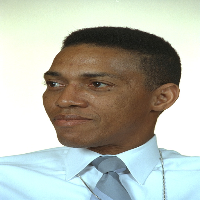

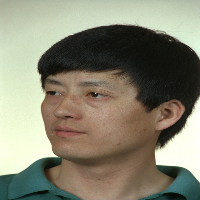

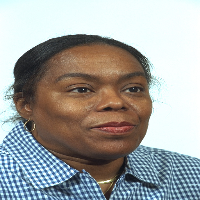

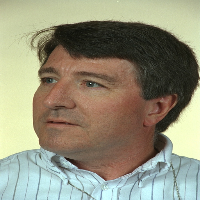

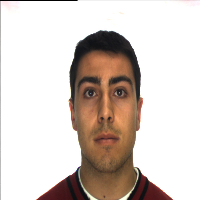

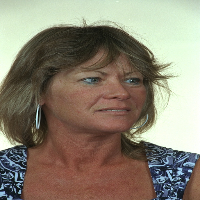

In [ ]:
for i in range(6):
  cv2_imshow(images[i])
  print(end=" ")

In [ ]:
def skin_detection(image):
  #First convert image to the HSV image format using opencv
  hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  hsv_image = cv2.inRange(hsv_image, (0, 15, 0), (17,170,255))
  hsv_image = cv2.morphologyEx(hsv_image, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
  hsv_image = cv2.bitwise_not(hsv_image)

  #Second step is to convert the image to YCrCb format
  ycrcb_image = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
  ycrcb_image = cv2.inRange(ycrcb_image, (0, 135, 85), (255,180,135))
  ycrcb_image = cv2.morphologyEx(ycrcb_image, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
  ycrcb_image = cv2.bitwise_not(ycrcb_image)

  #Combine the results of the HSV and the YCrCb to achieve a hybrid model for 
  #effective detection
  hybrid_model = cv2.bitwise_not(ycrcb_image, hsv_image)
  hybrid_model = cv2.medianBlur(global_mask,3)
  hybrid_model = cv2.morphologyEx(hybrid_model, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))
  hybrid_model = cv2.bitwise_not(hybrid_model)

  return hybrid_model


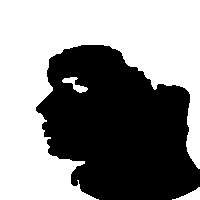

In [ ]:
image_mask = skin_detection(img)
cv2_imshow(image_maskz)

In [ ]:
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255))
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
HSV_result = cv2.bitwise_not(HSV_mask)

In [ ]:
img_YCbCr = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#skin color range for hsv color space 
YCbCr_mask = cv2.inRange(img_YCbCr, (0, 135, 85), (255,180,135)) 
YCbCr_mask = cv2.morphologyEx(YCbCr_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

YCbCr_result = cv2.bitwise_not(YCbCr_mask)

In [ ]:
global_mask=cv2.bitwise_and(YCbCr_mask,HSV_mask)
global_mask=cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))
global_result=cv2.bitwise_not(global_mask)

RESULTS SHOWING THE ORIGINAL IMAGE, HSV MASKED IMAGE, YCrCb MASKED IMAGE AND THE HYBRIDIZED IMAG.

In [ ]:
images = [img, HSV_result, YCbCr_result, global_result]

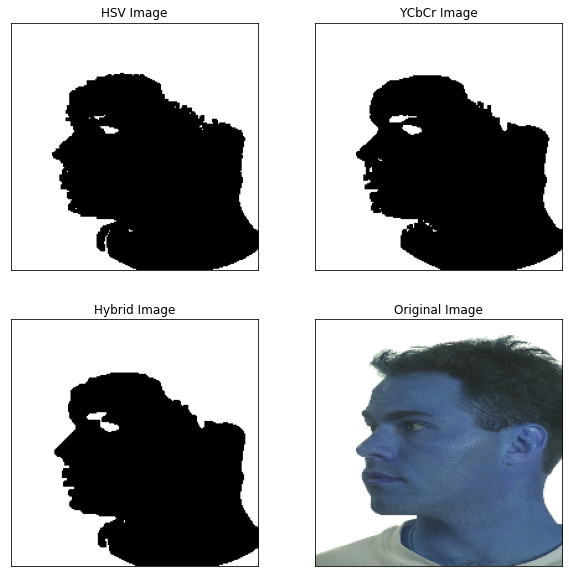

In [ ]:
plt.figure(figsize=([10, 10]))
plt.subplot(221),plt.imshow(HSV_result, cmap = 'gray')
plt.title('HSV Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(YCbCr_result, cmap = 'gray')
plt.title('YCbCr Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(global_result, cmap='gray')
plt.title('Hybrid Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()